# Forgobike Exploration Presentation

## by 

## Fatimah Ajoke Abudu Olaleye


## Investigation Overview

For the presentation, I focused on telling a story behind higher ride duration, with a look at different categorical variables like user types, gender, days, and so on. Lastly, I did some comparison between the two cities, San Francisco and New York bike rides datasets.

## Dataset Overview

This data set includes information about individual rides made for February, 2019 in a bike-sharing system covering the greater San Francisco Bay area and New York city.These bike share systems, with hundreds of stations and thousands of bikes across both cities. It’s a fun, affordable and convenient way to get around.

In [26]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [27]:
# loading datasets

forgobike_df = pd.read_csv('forgobike.csv')


## Distribution of ride duration
Plotted on a log scale, the distribution appears to be unimodal, with a lot of bike rides at the lower duration, lying less than 5000, with its peak between 500 and 1000. 

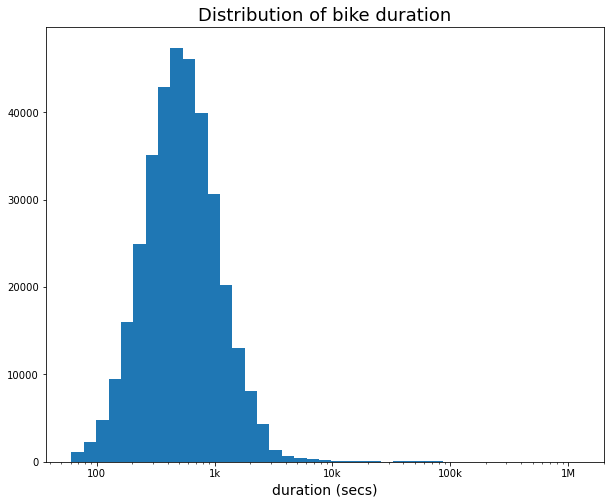

In [28]:
# Plotting using log transformation
def dist_trans(arg,size):
    ''' Plotting on a log transformation'''
    maximum = np.log10(forgobike_df[arg].max())
    minimum = np.log10(forgobike_df[arg].min())
    bins = 10 ** np.arange(minimum,maximum + size, size)
    plt.figure(figsize=[10,8])
    plt.hist(data=forgobike_df, x=arg, bins=bins)
    plt.xscale('log')
    plt.xticks([100,1e3,1e4,1e5,1e6],[100,'1k','10k','100k','1M'])
    plt.title('Distribution of bike duration', fontsize=18)
    plt.xlabel('duration (secs)', fontsize=14)
    plt.show()


dist_trans('duration_sec',0.105)

## Distribution of overall ages

The age distribution plotted on a normal scale, appears to be skewed to the right with concentration of ages between 25 to 40 from both city datasets.

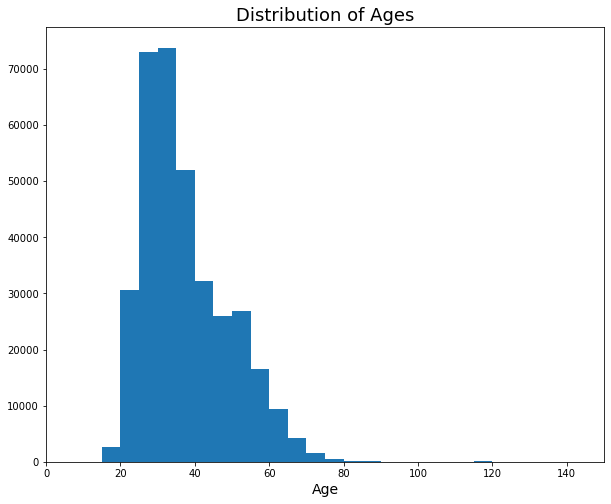

In [29]:
#Plotting age distribution
def age_dist(arg,size,xliml,xlimu):
    '''Plotting on a standard scaled plot'''   
    bins = np.arange(0, forgobike_df[arg].max()+size, size)
    plt.figure(figsize=[10, 8])
    plt.hist(data = forgobike_df, x = arg, bins = bins)
    plt.title('Distribution of Ages', fontsize=18)
    plt.xlabel('Age', fontsize=14)
    plt.xlim(xliml,xlimu)
    plt.show()
    
age_dist('member_age',5,0,150)

## Which of day of week have most trips corresponding to user type?

Thursday being the highest day trip taken. In this case, we have a better insight based on user type classification. Subscriber users appears to be highest on Thursdays, followed by Tuesday and Friday. Saturday and Sunday were the lowest days, but Wednesday appears to be the lowest for customer users.

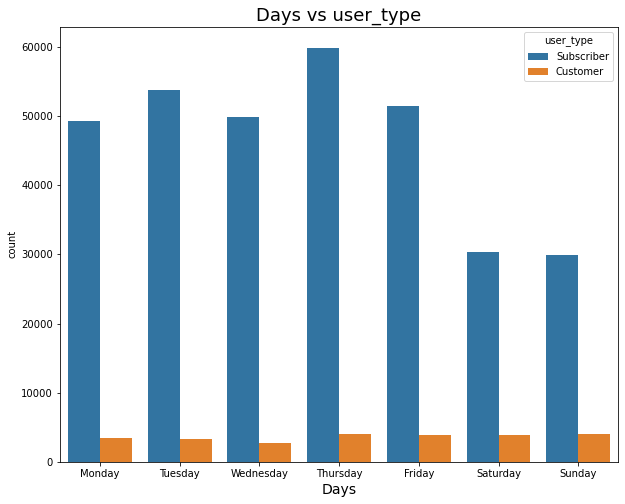

In [30]:
# plotting days vs user type
def day_trip(arg):
    ''' Plotting day of the week corresponding to arg'''
    color = sns.color_palette()[0]
    plt.figure(figsize=[10,8])
    sns.countplot(data=forgobike_df, x='trip_day',
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], hue=arg);
    plt.title(f'Days vs {arg}', fontsize=18)
    plt.xlabel('Days', fontsize=14)
day_trip('user_type')

## Which of day of week have most trips corresponding to gender?

Male members appear to have the highest ride on Thursdays with lowest on weekends.


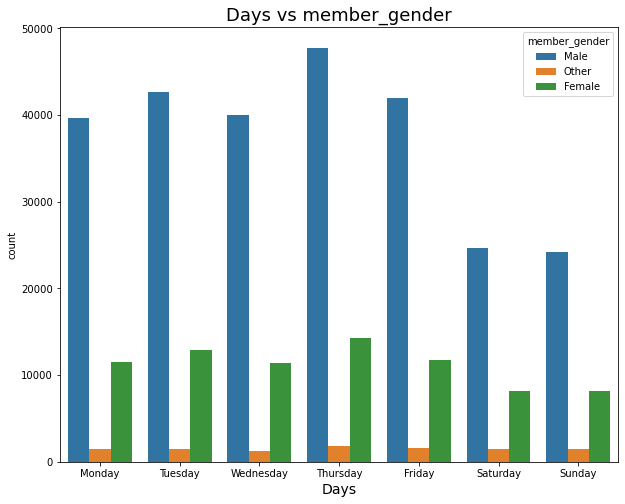

In [31]:
# Plotting day against gender
day_trip('member_gender')

## Comparison of New York and San Francisco duration based on User type?

More subscribers than customers, it appears customers have the highest duration on Monday, Tuesday, and Thursday. Except for Wednesday and Friday with duration by subscribers. The user type tends to be slightly close on Saturday duration.

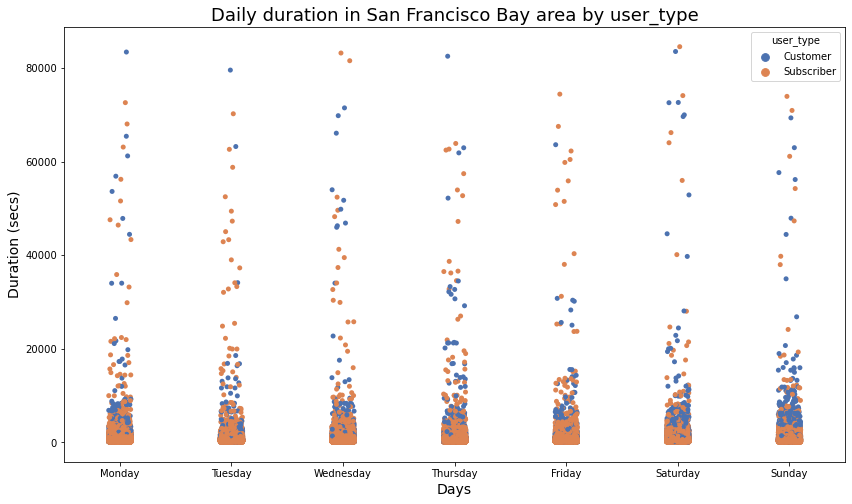

In [43]:
# Querying city rides
data_CA = forgobike_df.query('state_code == "CA"')
data_NYC = forgobike_df.query('state_code =="NYC"')

#Plotting day vs duration corresponding to individual cities and categorical variables. 
def compare_plot_ca(arr):
    ''' Plotting to compare cities against passed arr'''
    
    plt.figure(figsize = [14, 8])
    plt.title(f'Daily duration in San Francisco Bay area by {arr}', fontsize=18)
    sns.stripplot(data=data_CA, x='trip_day', y='duration_sec', hue=arr,
             order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='deep');
    plt.xlabel('Days', fontsize=14)
    plt.ylabel('Duration (secs)', fontsize=14)

plt.show()

# comparing user type
compare_plot_ca('user_type')


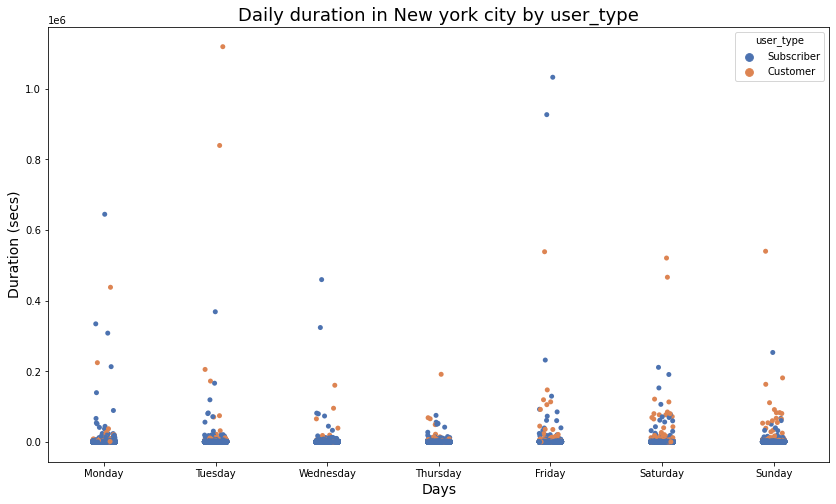

In [44]:
def compare_plot_nyc(arr):
    ''' Plotting to compare cities against passed arr'''
    
    plt.figure(figsize = [14, 8])       
    plt.title(f'Daily duration in New york city by {arr}', fontsize=18)
    sns.stripplot(data=data_NYC, x='trip_day', y='duration_sec', hue=arr,
                  order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='deep');
    plt.xlabel('Days', fontsize=14)
    plt.ylabel('Duration (secs)', fontsize=14)

plt.show()

# comparing user type
compare_plot_nyc('user_type')


## Comparison of New York and San Francisco duration based on gender?

More bike riding in San Francisco than New York, we have more male engagement than females, with male members having more duration than female. 

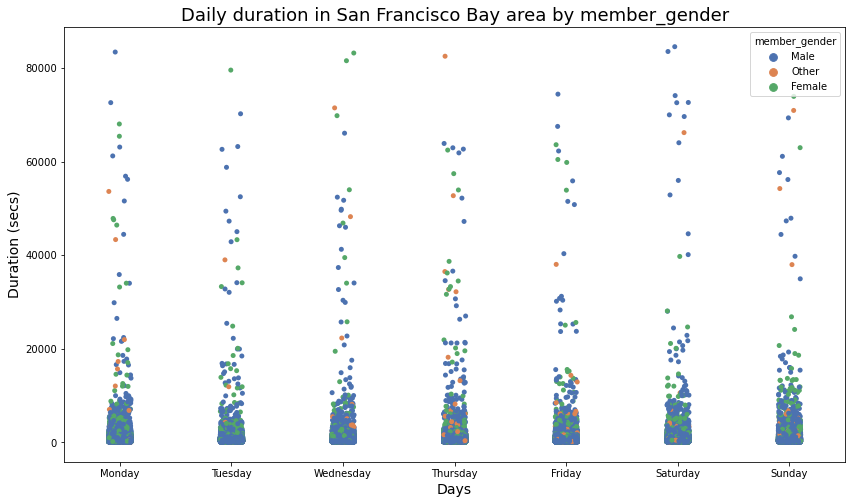

In [45]:
# Comparing gender for both cities
compare_plot_ca('member_gender')

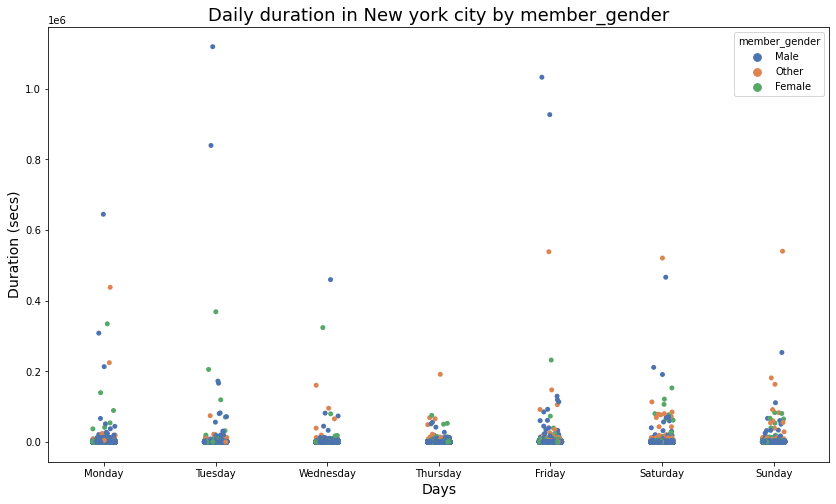

In [46]:
# Plotting NYC daily duration by gender
compare_plot_nyc('member_gender')

In [41]:
!jupyter nbconvert Forgobike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Forgobike_slide_deck.ipynb to slides
[NbConvertApp] Writing 1037985 bytes to Forgobike_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\YUSUF-ABDULGANIYU\anaconda3\envs\IAD\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\YUSUF-ABDULGANIYU\anaconda3\envs\IAD\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\YUSUF-ABDULGANIYU\anaconda3\envs\IAD\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\YUSUF-ABDULGANIYU\anaconda3\envs\IAD\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\YUSUF-ABDULGANIYU\anaconda3\envs\IAD\lib\site-packages\nbconvert\nbconvertapp.p